# In supervised learning

In [ ]:
# 1. linear reggression is for prediction of continuous values
# 2. logistic regression is for classification

In [ ]:
# classification is for discrete value
# regression is for continuous value

importing necessary packages

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [4]:
print("image data shape" , digits.data.shape)
print("label data shape",digits.target.shape)

image data shape (1797, 64)
label data shape (1797,)


In [ ]:
#(1797 ,64 ) # here 64 is due to 8*8 image

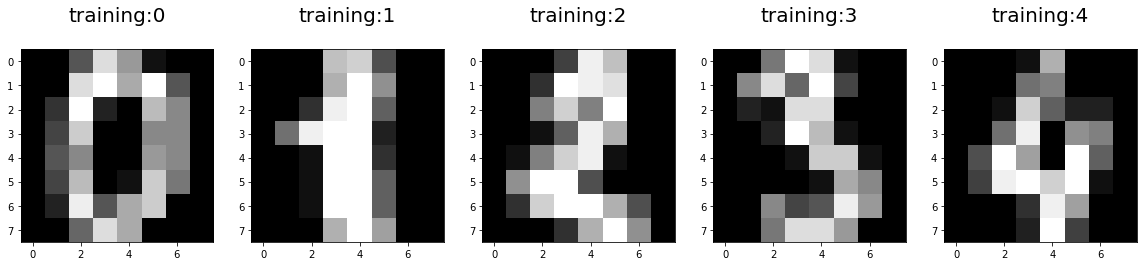

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (20,4))
for index , (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap = plt.cm.gray)
    plt.title('training:%i\n'% label , fontsize = 20)
    

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(digits.data,digits.target , test_size = 0.23,
                                                     random_state = 2)

In [11]:
print(x_train.shape)

(1383, 64)


In [12]:
print(y_train.shape)

(1383,)


In [13]:
print(x_test.shape)

(414, 64)


In [14]:
print(y_test.shape)

(414,)


In [16]:
from sklearn.linear_model import LogisticRegression

In [45]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [19]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [56]:
score = logisticRegr.score(x_test,y_test)
score

0.94202898550724634

In [59]:
predictions = logisticRegr.predict(x_test)

In [61]:
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Text(0.5,1,'Accuracy score.0.9420289855072463')

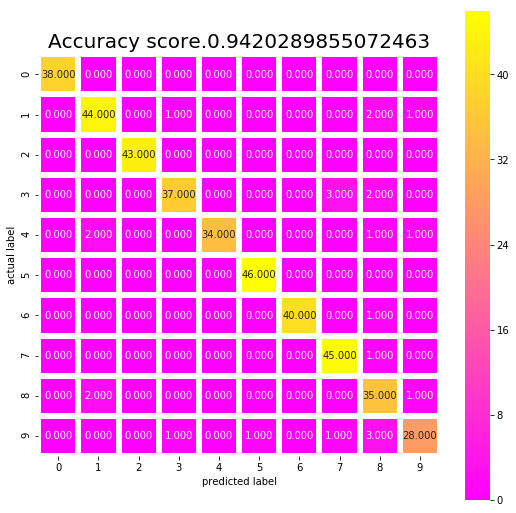

In [71]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True , fmt = '.3f',linewidths = 5 ,square = True,cmap = 'spring')
plt.ylabel('actual label')
plt.xlabel('predicted label')
all_sample_title = ('Accuracy score.{0}'.format(score))
plt.title(all_sample_title,size = 20)

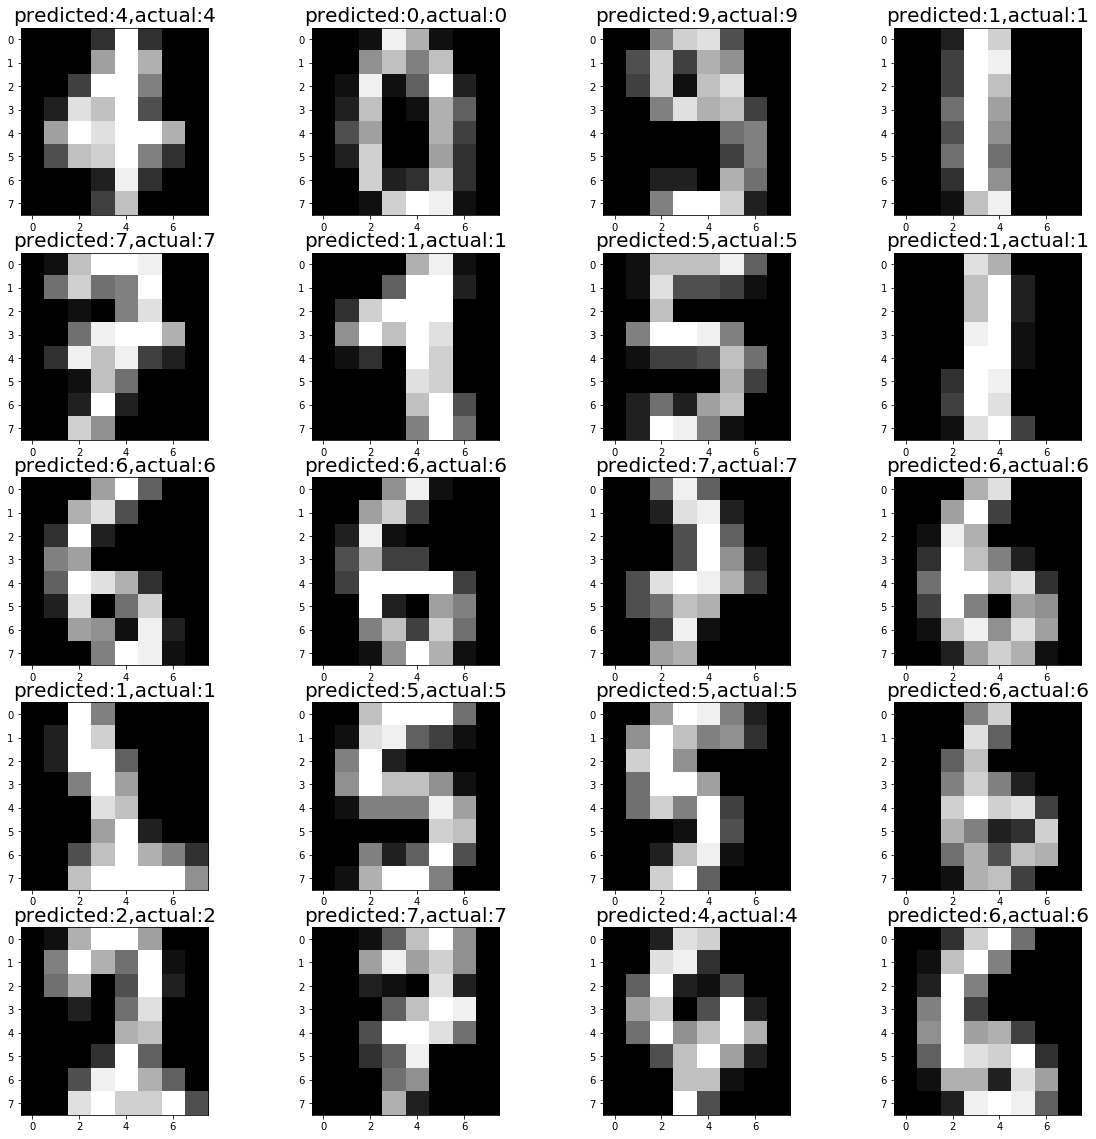

In [98]:
import matplotlib.pyplot as plt
import numpy as np
index = 0
classifiedIndex = []
for predict , actual in zip(predictions,y_test):
    if predict == actual :
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize = (20,20))
for plotIndex , correct in enumerate(classifiedIndex[0:20]):
    plt.subplot(5,4,plotIndex +1)
    plt.imshow(np.reshape(x_test[correct],(8,8)), cmap =plt.cm.gray)
    plt.title("predicted:{},actual:{}".format(predictions[correct], y_test[correct]),fontsize = 20)   